In [1]:
import gymnasium as gym
import numpy as np
import random
import time

In [2]:
# env = gym.make('FrozenLake-v1', render_mode="ansi")
from IPython import display
from gymnasium.envs.toy_text.frozen_lake import FrozenLakeEnv
from gymnasium.envs.toy_text.taxi import TaxiEnv
env = FrozenLakeEnv(desc=None, map_name="4x4", render_mode="ansi", is_slippery=True)
# FrozenLake8x8
# env = FrozenLakeEnv(desc=None, map_name="8x8", render_mode="ansi", is_slippery=True)
# Taxi
# env = TaxiEnv()

In [3]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [10]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [11]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [12]:
q_table

array([[0.55035951, 0.47650362, 0.48531267, 0.46763917],
       [0.13771068, 0.18335906, 0.0641431 , 0.44749262],
       [0.13061398, 0.29017147, 0.16386736, 0.15235361],
       [0.06517401, 0.03766804, 0.03083544, 0.23638874],
       [0.57666129, 0.45672838, 0.28204128, 0.38532195],
       [0.        , 0.        , 0.        , 0.        ],
       [0.12321754, 0.12372346, 0.1710029 , 0.06348625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.35735442, 0.38303798, 0.46034388, 0.63491759],
       [0.39451164, 0.71218157, 0.41770562, 0.49234418],
       [0.73072542, 0.35489558, 0.2102982 , 0.29107705],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.52518157, 0.5782646 , 0.80265542, 0.51972889],
       [0.70388971, 0.89179661, 0.7236153 , 0.71759266],
       [0.        , 0.        , 0.        , 0.        ]])

In [13]:
sum(rewards_all)

12391.0

In [14]:
sum(rewards_all[0:1000])

145.0

In [15]:
sum(rewards_all[1000:2000])

533.0

In [16]:
sum(rewards_all[2000:3000])

585.0

In [17]:
sum(rewards_all[9000:10000])

677.0

In [18]:
sum(rewards_all[19000:20000])

660.0

In [19]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [20]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(env.render())
            time.sleep(0.5)
            if not done:
                display.clear_output(wait=True)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [21]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [22]:
play_multiple_times(env, q_table, 1000)

Number of successes: 767/1000
Average number of steps: 43.79269882659713


In [23]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [24]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

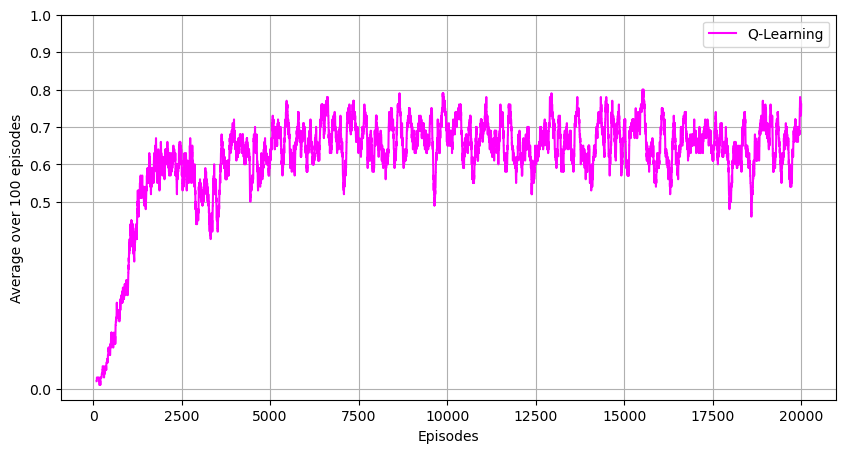

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

In [26]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)
        exploration = random.uniform(0, 1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        reward_episode = 0
        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)

            # Choose next action based on epsilon-greedy policy
            exploration = random.uniform(0, 1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            # SARSA update rule
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                                     learning_rate * (reward + gamma * q_table[next_state, next_action])

            reward_episode += reward
            state = next_state
            action = next_action

            if terminated or truncated:
                break

        rewards_all.append(reward_episode)

    return q_table, rewards_all



In [27]:
sarsa_table, rewards_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

In [28]:
sarsa_table

array([[0.52835847, 0.44698703, 0.43728696, 0.45013613],
       [0.24131944, 0.20756673, 0.18530566, 0.39666276],
       [0.32407666, 0.27340934, 0.25117276, 0.25384429],
       [0.19527236, 0.20629293, 0.19005857, 0.27713988],
       [0.56255833, 0.29974248, 0.30629186, 0.36195183],
       [0.        , 0.        , 0.        , 0.        ],
       [0.36508783, 0.11243305, 0.1328349 , 0.08763448],
       [0.        , 0.        , 0.        , 0.        ],
       [0.37440378, 0.25965588, 0.44638644, 0.60620742],
       [0.21099278, 0.65431769, 0.46888277, 0.36474114],
       [0.64273562, 0.27450442, 0.27333186, 0.29213456],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.54942173, 0.42804147, 0.7646718 , 0.37591079],
       [0.67215065, 0.89784186, 0.66660311, 0.65029186],
       [0.        , 0.        , 0.        , 0.        ]])

In [29]:
play_multiple_times(env, sarsa_table, 1000)

Number of successes: 770/1000
Average number of steps: 44.02857142857143


In [30]:
def plot_rewards(q_rewards, sarsa_rewards, title):
    plt.figure(figsize=(10, 6))
    plt.plot(np.convolve(q_rewards, np.ones(100)/100, mode='valid'), label='Q-Learning', color='blue')
    plt.plot(np.convolve(sarsa_rewards, np.ones(100)/100, mode='valid'), label='SARSA', color='orange')
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward (moving avg)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

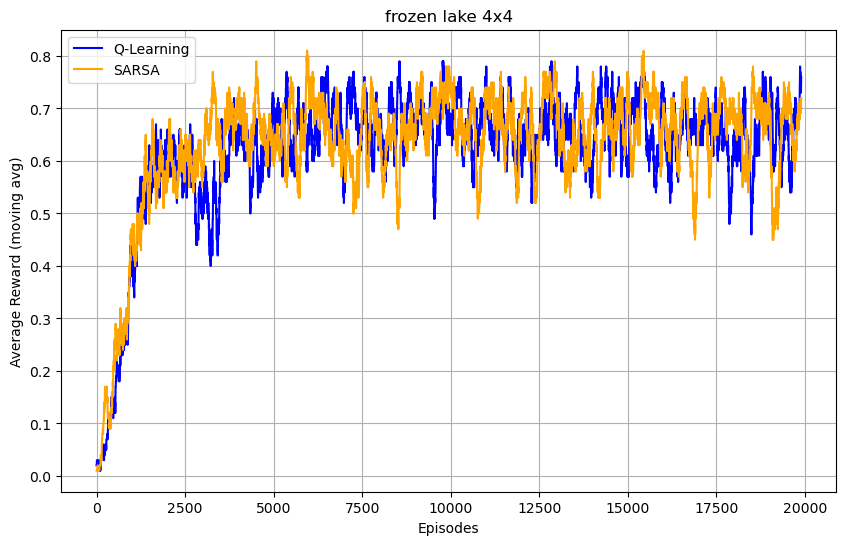

In [31]:
plot_rewards(rewards_all, rewards_sarsa, "frozen lake 4x4")

Episode 49999 finished


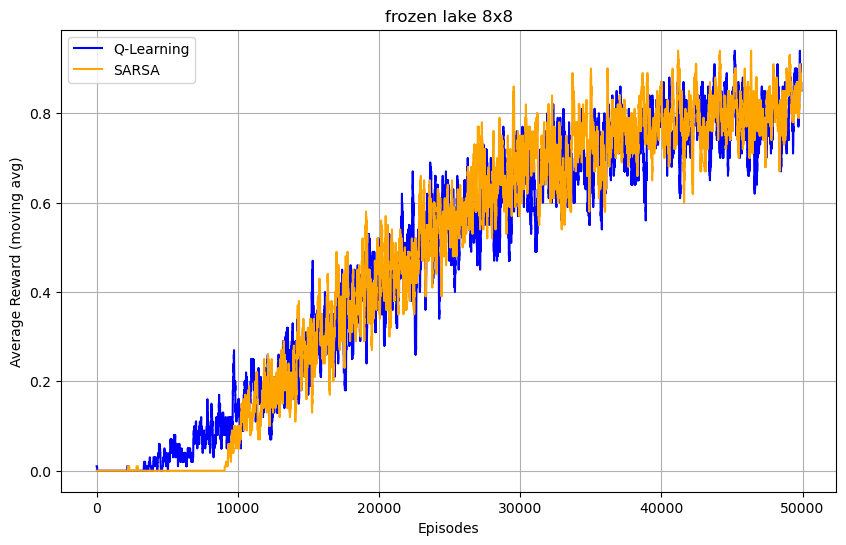

In [32]:
# FrozenLake8x8
env = FrozenLakeEnv(desc=None, map_name="8x8", render_mode="ansi", is_slippery=True)
# Taxi
# env = TaxiEnv()
num_steps_per_episode = 500
num_episodes = 50_000  # or more
epsilon_decay_rate = 0.0001

q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

sarsa_table, rewards_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

plot_rewards(rewards_all, rewards_sarsa, "frozen lake 8x8")

Episode 49999 finished


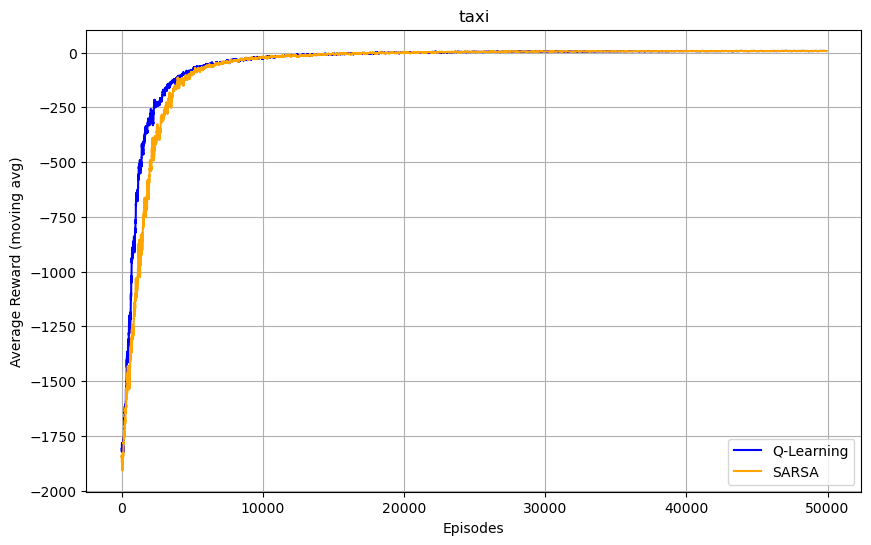

In [33]:
# Taxi
env = TaxiEnv()

q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

sarsa_table, rewards_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

plot_rewards(rewards_all, rewards_sarsa, "taxi")

Frozen lake 4x4:
Cả Q-Learning và SARSA đều đạt được mức trung bình phần thưởng xấp xỉ 0.7–0.75 sau khoảng 10.000 ep

SARSA có xu hướng mượt hơn so với Q-Learning sau khoảng 3000 ep

Hai thuật toán có hiệu suất tương đương về mặt tổng thể

FrozenLake 8x8

SARSA tốt hơn Q-Learning trong thời gian train:

Q-Learning học chậm hơn và dao động mạnh hơn, nhưng dần bắt kịp khi đến khoảng 40.000–50.000 ep

Taxi

Cả hai thuật toán đều học rất tốt

Q-Learning có tốc độ học nhanh hơn ban đầu, đạt phần thưởng tốt hơn sớm hơn so với SARSA.

Sau khoảng 15.000 ep, cả hai hội tụ về hiệu suất tương tự nhau.